# **Data Science Interns - Assessment 1**


### **Introduction**

This Exams takes 4 hours.

Follow the instructions given on how to answer every question.

At the end of the exam Save your notebook, download and share the notebook in .ipynb formart to (dgitahi@safaricom.co.ke, lkangethe@safaricom.co.ke)

NB: 

* To save the notebook: go to File< Save a Copy on Drive

* To download: go to File< Download < Download.ipynb 

You are expected to share the notebook within 30 minutes after the Exam


#### **All the Best Good People**


#### **Load DataSet**
Load the Data from the your drive



In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


df_train = pd.read_csv('drive/MyDrive/train_df.csv')
df_test = pd.read_csv('drive/MyDrive/test_df.csv')



**Check the structure of the data and the size of the data**


Hint: Variable types,shape of the data

In [30]:
print(df_train.shape)
for col in df_train:
  print(col + ' has variables of type ' + str(df_train[col].dtype))

(100800, 12)
MSISDN has variables of type object
var1m0 has variables of type float64
var2m0 has variables of type float64
var2m1 has variables of type float64
var2m2 has variables of type float64
var3m0 has variables of type float64
var3m1 has variables of type float64
var3m2 has variables of type float64
var4m0 has variables of type float64
var4m1 has variables of type float64
var4m2 has variables of type float64
churn has variables of type int64


The structure of the training dataframe is 12 columns and 100800 rows

#### **Check for the Missing Numbers**
If there is any give a recommendation whether to impute for the missing value and the appropriate method.


In [31]:
# First check the percentage of missing varibles in each column
print(df_train.isnull().sum()/df_train.shape[0])


MSISDN    0.000000
var1m0    0.053353
var2m0    0.389891
var2m1    0.362589
var2m2    0.333492
var3m0    0.053353
var3m1    0.053353
var3m2    0.053353
var4m0    0.389891
var4m1    0.362589
var4m2    0.333492
churn     0.000000
dtype: float64


All the independent variables have missing values but, in all cases, it's a minority. There is therefore no variable that should be dropped  on the basis of missing values

In [32]:
# Check what the training dataset would look like if all rows with any missing values were dropped
df_train_with_rows_dropped = df_train.dropna()
print('%s of rows would be dropped \n' % (1-df_train_with_rows_dropped.shape[0]/df_train.shape[0]))
print('The churn distribution of customers on original dataset:')
print(df_train['churn'].value_counts())
print('\nThe churn distribution of customers on the dataset with rows dropped:')
print(df_train_with_rows_dropped['churn'].value_counts())


0.5022619047619048 of rows would be dropped 

The churn distribution of customers on original dataset:
0    73316
1    27484
Name: churn, dtype: int64

The churn distribution of customers on the dataset with rows dropped:
0    48896
1     1276
Name: churn, dtype: int64


If rows with any missing values are dropped, about half the rows would be removed. Additionally, there would be only 1276 customers who churned down from 27484 in original dataset. This is a lot of information loss as churned customers would then be 2.5% of dataset as opposed to 27% in original, therefore missing values may be better off being imputed using the medians but before this, the rows which have missing values on all the independent variables should be removed as imputing them will increase model inaccuracy

In [33]:
nummissing = list(df_train.T.isnull().sum())
df_train['number_of_missing_variables'] = nummissing

print(df_train['number_of_missing_variables'].value_counts())


0     50172
6     17422
2     14590
4     13238
10     5378
Name: number_of_missing_variables, dtype: int64


From an earlier cell, it has been seen that 'churn' and 'MSISDN' have no missing values hence all missing values are on the independent variables. There are 10 independent variables and 5378 customers have no information on any of these variables and should be dropped

In [34]:
df_train = df_train.loc[df_train['number_of_missing_variables'] < 10]
df_train.drop('number_of_missing_variables', axis = 1, inplace = True)
print(df_train.shape)

(95422, 12)


In [35]:

skips = ['MSISDN', 'churn']
for col in df_train:
    if(col in skips):
        continue        
    df_train[col].fillna(df_train[col].median(), inplace= True)
    df_test[col].fillna(df_test[col].median(), inplace= True)



#### **Check for Duplicates**
If any drop the duplicates.

In [36]:
trainlengthbefore = df_train.shape[0]
df_train.drop_duplicates(inplace = True)
trainlengthafter = df_train.shape[0]

df_test.drop_duplicates(inplace= True)
print('There were %s duplicates in train dataset' % (trainlengthbefore - trainlengthafter))


There were 36 duplicates in train dataset


#### **Check for Outliers**
Hint: Use the appropriate plots, and explain the results.

If need be treat the outliers.

Outliers taken to be values that are more than 3 standard deviations from the the means in each variable. Customers with these values may be dropped 



var1m0


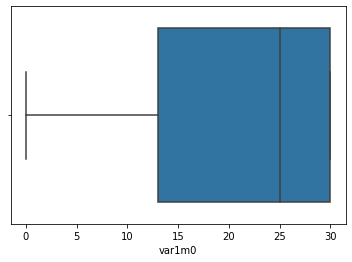

The cutoff for var1m0 is 52.09412761129833
There are 0 outliers on this variable


var2m0


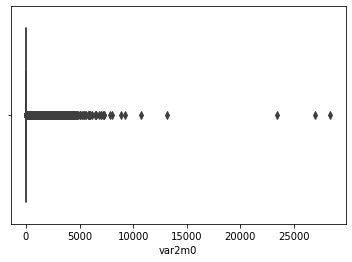

The cutoff for var2m0 is 1016.2694304227699
There are 1219 outliers on this variable


var2m1


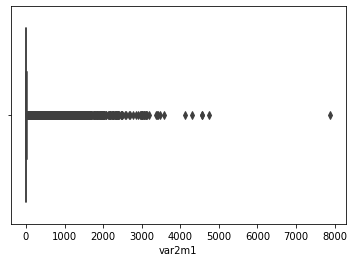

The cutoff for var2m1 is 520.6670846301863
There are 1757 outliers on this variable


var2m2


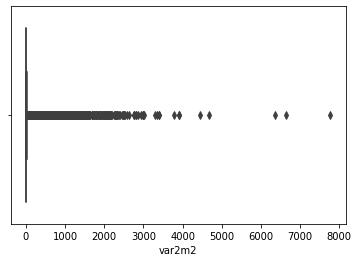

The cutoff for var2m2 is 472.13155222540087
There are 1522 outliers on this variable


var3m0


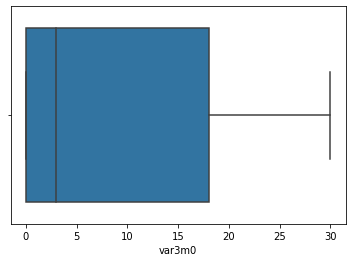

The cutoff for var3m0 is 42.10286141716686
There are 0 outliers on this variable


var3m1


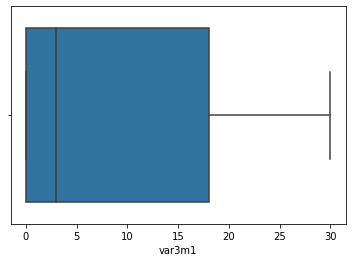

The cutoff for var3m1 is 42.241397452534386
There are 0 outliers on this variable


var3m2


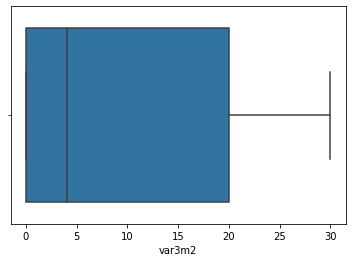

The cutoff for var3m2 is 43.08027502624688
There are 0 outliers on this variable


var4m0


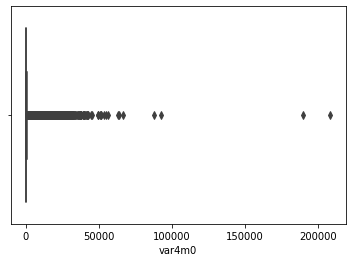

The cutoff for var4m0 is 8127.123284265291
There are 1454 outliers on this variable


var4m1


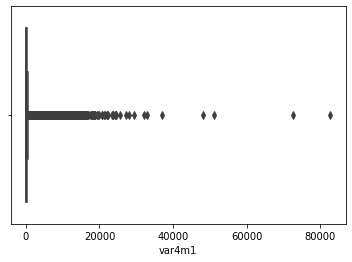

The cutoff for var4m1 is 4531.692086376273
There are 1836 outliers on this variable


var4m2


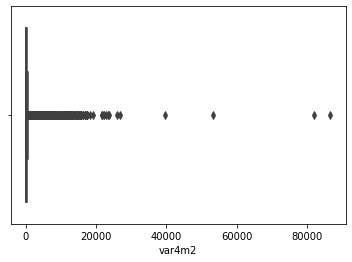

The cutoff for var4m2 is 3743.689186670024
There are 1571 outliers on this variable
(86027, 12)


In [37]:
for col in df_train:
  if col in skips:
    continue
  print('\n')
  print(col)

  sns.boxplot(x= df_train[col])
  plt.show()

  olen = df_train.shape[0]


  cutoff = df_train[col].mean() + (3*df_train[col].std())
  print('The cutoff for %s is %s' % (col, cutoff))

  df_train = df_train.loc[df_train[col] < cutoff]

  flen = df_train.shape[0]

  print('There are %s outliers on this variable' % (olen- flen))

print(df_train.shape)

  



#### **Data Descriptives**

Group the customers by churn. How many customers churned/Not churned and count how many customers are in each of the group.

In [38]:
df_grouped = df_train.groupby('churn', as_index=False).MSISDN.count()
df_grouped.columns = ['Churn', 'Number of customers']
print(df_grouped)

   Churn  Number of customers
0      0                64021
1      1                22006


Group by churn and compute the Min,max,median,mean and count in each of the independent variables

In [39]:
df_grouped2 = df_train.drop('MSISDN', axis= 1).groupby('churn').agg([np.min,np.max, np.median, np.mean, 'count'])
print(df_grouped2.T)

churn                     0             1
var1m0 amin        0.000000      0.000000
       amax       30.000000     30.000000
       median     26.000000     14.000000
       mean       22.033489     13.799282
       count   64021.000000  22006.000000
var2m0 amin        0.000000      0.000000
       amax     1013.531700    693.000000
       median      0.012600      0.012600
       mean       27.192919      2.214000
       count   64021.000000  22006.000000
var2m1 amin        0.000000      0.000000
       amax      520.300200    479.333600
       median      0.021000      0.021000
       mean       25.187902      2.378682
       count   64021.000000  22006.000000
var2m2 amin        0.000000      0.000000
       amax      472.000000    472.000000
       median      0.054600      0.054600
       mean       27.093231      4.590656
       count   64021.000000  22006.000000
var3m0 amin        0.000000      0.000000
       amax       30.000000     30.000000
       median      6.000000      0

Bin variables var1m0,var2m0,var3m0,var4m0 using qcut with q=4

How many customers who churned/not churned are in each group

In [40]:
df_train['Var1m0_bins'] = pd.qcut(x= df_train['var1m0'], q= 4, duplicates='drop')
df_train['Var2m0_bins'] = pd.qcut(x= df_train['var2m0'], q= 4, duplicates='drop')
df_train['Var3m0_bins'] = pd.qcut(x= df_train['var3m0'], q= 4, duplicates='drop')
df_train['Var4m0_bins'] = pd.qcut(x= df_train['var4m0'], q= 4, duplicates='drop')

print(df_train.groupby(['churn','Var1m0_bins']).MSISDN.agg(['count']))
print(df_train.groupby(['churn','Var2m0_bins']).MSISDN.agg(['count']))
print(df_train.groupby(['churn','Var3m0_bins']).MSISDN.agg(['count']))
print(df_train.groupby(['churn','Var4m0_bins']).MSISDN.agg(['count']))


                      count
churn Var1m0_bins          
0     (-0.001, 12.0]  12045
      (12.0, 24.0]    15899
      (24.0, 29.0]    17107
      (29.0, 30.0]    18970
1     (-0.001, 12.0]  10581
      (12.0, 24.0]     5484
      (24.0, 29.0]     3700
      (29.0, 30.0]     2241
                          count
churn Var2m0_bins              
0     (-0.001, 0.0126]    40631
      (0.0126, 0.0882]     2655
      (0.0882, 1013.532]  20735
1     (-0.001, 0.0126]    21177
      (0.0126, 0.0882]       83
      (0.0882, 1013.532]    746
                     count
churn Var3m0_bins         
0     (-0.001, 2.0]  23847
      (2.0, 15.0]    19437
      (15.0, 30.0]   20737
1     (-0.001, 2.0]  20827
      (2.0, 15.0]      731
      (15.0, 30.0]     448
                           count
churn Var4m0_bins               
0     (-0.001, 4.011]      20558
      (4.011, 97.599]      21619
      (97.599, 116.946]      767
      (116.946, 8118.012]  21077
1     (-0.001, 4.011]        949
      (4.011, 97.

#### **Visualization**

Using bar chart explain the relationship between the variables var2m1,var3m1,var4m1 and the churn variable

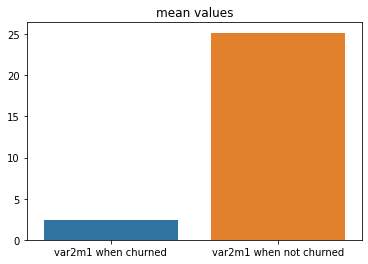

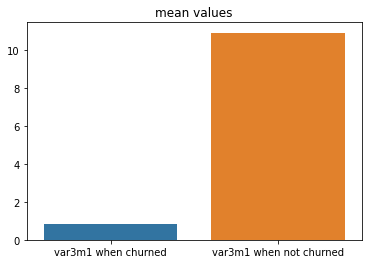

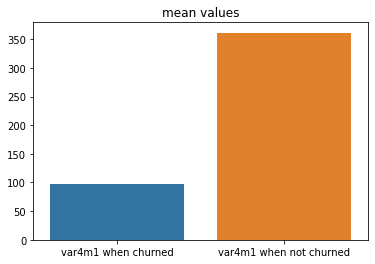

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['var2m1', 'var3m1', 'var4m1']

for var in variables:
  m1 = df_train.loc[df_train['churn']== 1, var].mean()
  m2 = df_train.loc[df_train['churn']== 0, var].mean()
  sns.barplot(x = [var + ' when churned',var + ' when not churned'], y = [m1,m2])
  plt.title('mean values')
  plt.show()

  


Using scatter plot explain the relationship between var4m0 and var4m2.

Explain the type of correlation observed.

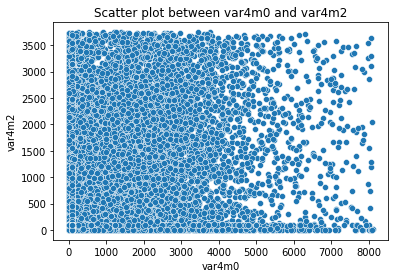

The correlation is 0.5288104958712532


In [42]:
sns.scatterplot(x= df_train['var4m0'], y=df_train['var4m2'])
plt.title('Scatter plot between var4m0 and var4m2')
plt.show()
print('The correlation is ' + str(df_train['var4m0'].corr(df_train['var4m2'])))

Use density plot to explain the distribution of var4m2 for the Churn and Non-Churn customers

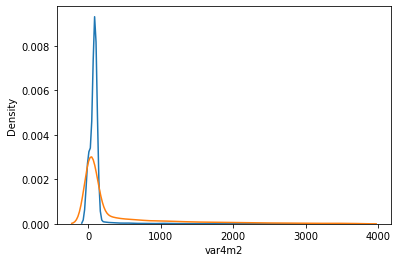

In [43]:
sns.kdeplot(data = df_train.loc[df_train['churn']== 1,'var4m2'])
sns.kdeplot(data = df_train.loc[df_train['churn']== 0,'var4m2'])


Use Histogram and comment on the distribution of the following features: var2m0,var3m1,var4m2

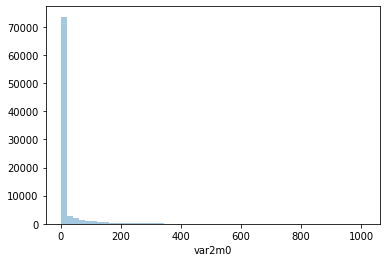

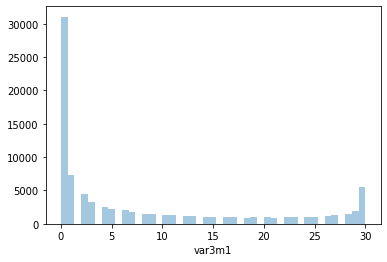

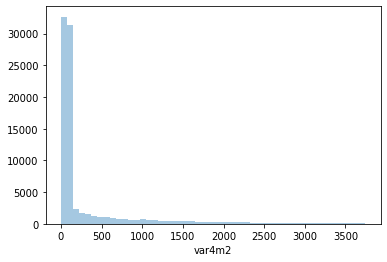

In [44]:
variables = ['var2m0', 'var3m1', 'var4m2']

for var in variables:
    sns.distplot(a= df_train[var], kde=False)
    plt.show()


Using BoxPlot, identify what is the median,1st interquartile, 2nd Interquartile and the 3rd interquartile for the variable var3m2. 

Split the data into churn and Non-Churn

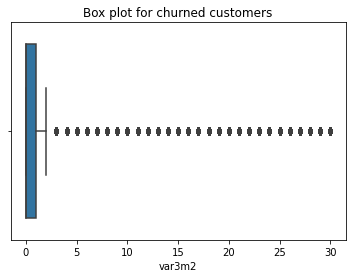

count    22006.000000
mean         1.809325
std          4.933191
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         30.000000
Name: var3m2, dtype: float64


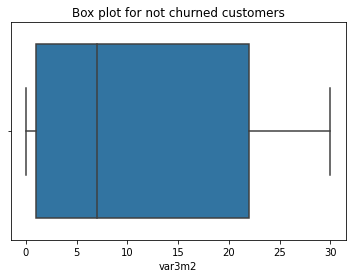

count    64021.000000
mean        11.314225
std         10.922362
min          0.000000
25%          1.000000
50%          7.000000
75%         22.000000
max         30.000000
Name: var3m2, dtype: float64


In [45]:

sns.boxplot(x= df_train.loc[df_train['churn']== 1, 'var3m2'])
plt.title('Box plot for churned customers')
plt.show()
print(df_train.loc[df_train['churn']== 1, 'var3m2'].describe())


sns.boxplot(x= df_train.loc[df_train['churn']== 0, 'var3m2'])
plt.title('Box plot for not churned customers')
plt.show()
print(df_train.loc[df_train['churn']== 0, 'var3m2'].describe())

Use a heatmap to demostrate the correlation between the independent variables.

Text(0.5, 1.0, 'Correlations')

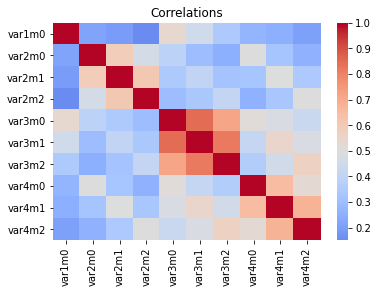

In [46]:
corrs = df_train.drop('churn', axis= 1).corr()
sns.heatmap(data= corrs, center= 0.5, cmap = 'coolwarm')
plt.title('Correlations')

#### **Hypothesis Testing**
Using the variable var2m0 and the dependant variable churn, Formulate a hypothesis and test the hypothesis

Hint: Have a null Hypothesis and an alternative hypothesis. The two groups you are comparing is the churn and not-churn 

In [47]:
import math
# hypothesis test of the means between both groups
#Null hypothesis: There is no difference between the means in the two groups on var2m0
#Alternative hypothesis: There is a difference
# Significance level: 1%

Churnedmean = df_train.loc[df_train['churn']== 1, 'var2m0'].mean()
Notchurnedmean = df_train.loc[df_train['churn']== 0, 'var2m0'].mean()
Churnedstd = df_train.loc[df_train['churn']== 1, 'var2m0'].std()
Notchurnedstd = df_train.loc[df_train['churn']== 0, 'var2m0'].std()
Churnedcount = df_train.loc[df_train['churn']== 1, 'var2m0'].count()
Notchurnedcount = df_train.loc[df_train['churn']== 0, 'var2m0'].count()

meandifference = abs(Churnedmean - Notchurnedmean)
se1 = Churnedstd*Churnedstd/Churnedcount
se2 = Notchurnedstd*Notchurnedstd/Notchurnedcount

zscore = meandifference/(math.sqrt(se1 + se2))
print('The Z-score is ' + str(zscore))



The Z-score is 71.37997786912287


The Z-score is very high the null hypothesis can be rejected

#### **Feature Engineering**
Using the existinge feature compute new features. 

Hint: Compute ratios for the M1 and M0 and M2 and M0 for the var2 and var3

In [48]:
df_train['var2m0bym1'] = df_train['var2m0']/(df_train['var2m1']+1)
df_train['var2m1bym2'] = df_train['var2m1']/(df_train['var2m2']+1)
df_train['var3m0bym1'] = df_train['var3m0']/(df_train['var3m1']+1)
df_train['var3m1bym2'] = df_train['var3m1']/(df_train['var3m2']+1)
df_test['var2m0bym1'] = df_test['var2m0']/(df_test['var2m1']+1)
df_test['var2m1bym2'] = df_test['var2m1']/(df_test['var2m2']+1)
df_test['var3m0bym1'] = df_test['var3m0']/(df_test['var3m1']+1)
df_test['var3m1bym2'] = df_test['var3m1']/(df_test['var3m2']+1)


# 1 added to avoid getting infinity values when the divisor variable is zero


#### **Model Building**
Using the features provided and the features computed above build a model to predict the customer churn.


Model Building Process

* Split the data into training and validation (80:20)
* Train and Fit a model using the training data set
* Use the model to predict on the validation data set
* Evalute the Model Performance:Compute the following metrics
    * AUC
    * Recall
    * Precision
    * F1 Score
* Compute Confusion Matrix
* Visualize the ROC curve


NB: Repeat the process above for all the four models below.

- Build a decision Tree model (and show the tree diagram)

- Random Forest

- Logistic Regression

- Any Boosting Model



Based on the evalution metrics select the best model.

Choose the best model based on the validation results. Predict churn on the test data,save as csv and email your results to (dgitahi@safaricom.co.ke, lkangethe@safaricom.co.ke). 

Ensure you share the results within 30 minutes after the end of this exam

NB: Your results should be in the below format.




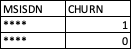


1- for churn, 0- Not-churn


In [49]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

x = df_train.select_dtypes('number').drop('churn', axis= 1)
y = df_train['churn']
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=0.8, test_size=0.2)

print('Variables used: ')
print(list(x.columns))

def scoremodel(ytest, yprobabilities):

  #get best fscore across different threshold probabilities

  maxfscore = 0
  for j in range(1, 99, 1):
    threshold = j/100
    adjpredicts = [yprobabilities[i][1] > threshold for i in range(len(yprobabilities))]

    cf = confusion_matrix(ytest, adjpredicts)
    recall = cf[1, 1] / sum(cf[1, :])
    precision = cf[1, 1] / sum(cf[:, 1])
    fscore = 2 * (recall * precision) / (recall + precision)

    if(fscore > maxfscore):
      maxfscore = fscore
      bestthresh = threshold
      cprecision = precision
      crecall = recall
      bestcf = cf

  return maxfscore,cprecision, crecall, bestthresh,bestcf



Variables used: 
['var1m0', 'var2m0', 'var2m1', 'var2m2', 'var3m0', 'var3m1', 'var3m2', 'var4m0', 'var4m1', 'var4m2', 'var2m0bym1', 'var2m1bym2', 'var3m0bym1', 'var3m1bym2']



Best fscore on train: 0.9449168404727525
Precision on train: 0.8956305758313058
Recall on train: 0.9999434069043577
Threshold probability 0.34



fscore on test: 0.7902007338657457
Precision on test: 0.7425963488843813
Recall on test: 0.8443265682656826
Test confusion matrix: 
[[11601  1269]
 [  675  3661]]


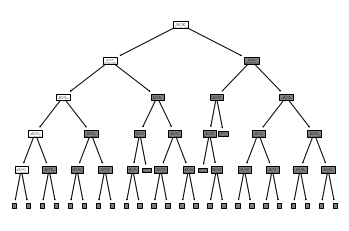

In [28]:
# Decision tree assessment

dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
tree.plot_tree(dt, max_depth = 4)
ypredicts = dt.predict_proba(xtrain)
fscore, precision,recall,thresh,cf= scoremodel(ytrain, ypredicts)

ypredictstest = dt.predict_proba(xtest)
adjpredicts = [ypredictstest[i][1] > thresh for i in range(len(ypredictstest))]
tcf = confusion_matrix(ytest, adjpredicts)
trecall = tcf[1, 1] / sum(tcf[1, :])
tprecision = tcf[1, 1] / sum(tcf[:, 1])
tfscore = 2 * (trecall * tprecision) / (trecall + tprecision)



print('\nBest fscore on train: '+ str(fscore))
print('Precision on train: ' + str(precision))
print('Recall on train: '+ str(recall))
print('Threshold probability ' + str(thresh))

print('\n')
print('\nfscore on test: '+ str(tfscore))
print('Precision on test: ' + str(tprecision))
print('Recall on test: '+ str(trecall))
print('Test confusion matrix: ')
print(tcf)










In [50]:
# Random forest assessment

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain, ytrain)

ypredicts = rfmodel.predict_proba(xtrain)
fscore, precision,recall,thresh,cf= scoremodel(ytrain, ypredicts)

ypredictstest = rfmodel.predict_proba(xtest)
adjpredicts = [ypredictstest[i][1] > thresh for i in range(len(ypredictstest))]
tcf = confusion_matrix(ytest, adjpredicts)
trecall = tcf[1, 1] / sum(tcf[1, :])
tprecision = tcf[1, 1] / sum(tcf[:, 1])
tfscore = 2 * (trecall * tprecision) / (trecall + tprecision)

rfp = thresh



print('\nBest fscore on train: '+ str(fscore))
print('Precision on train: ' + str(precision))
print('Recall on train: '+ str(recall))
print('Threshold probability ' + str(thresh))

print('\n')
print('\nfscore on test: '+ str(tfscore))
print('Precision on test: ' + str(tprecision))
print('Recall on test: '+ str(trecall))
print('Test confusion matrix: ')
print(tcf)




Best fscore on train: 0.9436262061960387
Precision on train: 0.8937667730011646
Recall on train: 0.9993771939757672
Threshold probability 0.5



fscore on test: 0.8428394645066937
Precision on test: 0.8242024202420242
Recall on test: 0.8623388581952118
Test confusion matrix: 
[[12063   799]
 [  598  3746]]


In [51]:
# Logistic assessment

lmodel = LogisticRegression()
lmodel.fit(xtrain, ytrain)


ypredicts = lmodel.predict_proba(xtrain)
fscore, precision,recall,thresh,cf= scoremodel(ytrain, ypredicts)

ypredictstest = lmodel.predict_proba(xtest)
adjpredicts = [ypredictstest[i][1] > thresh for i in range(len(ypredictstest))]
tcf = confusion_matrix(ytest, adjpredicts)
trecall = tcf[1, 1] / sum(tcf[1, :])
tprecision = tcf[1, 1] / sum(tcf[:, 1])
tfscore = 2 * (trecall * tprecision) / (trecall + tprecision)



print('\nBest fscore on train: '+ str(fscore))
print('Precision on train: ' + str(precision))
print('Recall on train: '+ str(recall))
print('Threshold probability ' + str(thresh))

print('\n')
print('\nfscore on test: '+ str(tfscore))
print('Precision on test: ' + str(tprecision))
print('Recall on test: '+ str(trecall))
print('Test confusion matrix: ')
print(tcf)


Best fscore on train: 0.8384838700925197
Precision on train: 0.8050013024225059
Recall on train: 0.8748726078586796
Threshold probability 0.46



fscore on test: 0.8368951389657845
Precision on test: 0.8062726690847024
Recall on test: 0.8699355432780848
Test confusion matrix: 
[[11954   908]
 [  565  3779]]


In [52]:
# Boosting assessment

model = XGBRegressor(n_estimators=500)
model.fit(xtrain, ytrain, early_stopping_rounds=5, eval_set=[(xtest, ytest)],verbose=False)



score = model.score(xtest, ytest)
print(score)

[06:41:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.6600166042447732


Of the models tested, the random forest model had the best fscore on validation and will be used on the test data

In [55]:

testset = df_test.drop('MSISDN', axis= 1)

testpredicts = rfmodel.predict_proba(testset)
adjpredicts = [testpredicts[i][1] > rfp for i in range(len(testpredicts))]

answers = pd.DataFrame()
answers['MSISDN'] = df_test['MSISDN']
answers['Churn'] = adjpredicts
answers['Churn'] = answers['Churn'].astype('int')
answers.set_index('MSISDN', inplace = True)

answers.to_csv('test_data_classification.csv')
